<a href="https://www.kaggle.com/code/ayafnabih/titanic-eda?scriptVersionId=249056224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Description

You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

The Titanic dataset provides information about passengers aboard the Titanic, including their demographic details, ticket information, and survival status. Below is a detailed description of each column:

| Column        | Type                   | Description |
|---------------|------------------------|-------------|
| **PassengerId** | Integer               | Unique identifier for each passenger. |
| **Survived**    | Categorical (0 = No, 1 = Yes) | Whether the passenger survived. **Target variable.** |
| **Pclass**      | Ordinal (1, 2, 3)     | Ticket class: 1 = First, 2 = Second, 3 = Third class. |
| **Name**        | String                | Full name of the passenger (includes titles like Mr., Mrs.). |
| **Sex**         | Categorical           | Gender (`male`, `female`). |
| **Age**         | Float                 | Age in years. May contain missing values. |
| **SibSp**       | Integer               | Number of siblings or spouses aboard. |
| **Parch**       | Integer               | Number of parents or children aboard. |
| **Ticket**      | String                | Ticket number (may be shared among passengers). |
| **Fare**        | Float                 | Fare paid for the ticket. |
| **Cabin**       | String                | Cabin number. Many missing values. |
| **Embarked**    | Categorical (`C`, `Q`, `S`) | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton. |


# Importing Libraries

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring the Data

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Duplicate Values

In [6]:
df.duplicated().sum()

0

>If there are any duplicates, we will drop them:

         df.drop_duplicates(inplace=True)

# Missing Values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
round(df.isna().mean()*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
df.dropna(subset =['Embarked'],inplace = True)

In [10]:
round(df.isna().mean()*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.91
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.28
Embarked        0.00
dtype: float64

<Axes: >

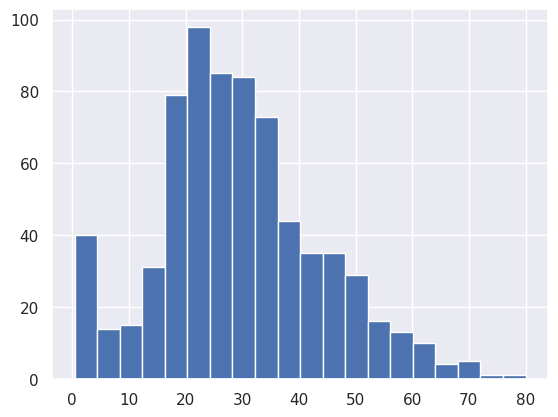

In [11]:
df.Age.hist(bins=20)

## Using KNN Imputation

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df[['Age']] = imputer.fit_transform(df[['Age']])

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Drop Columns

In [14]:
# Drop Unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename Columns

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
505,0,1,male,18.0,1,0,108.9,C


# Univariate Analysis

In [17]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

In [18]:
df.survived.value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

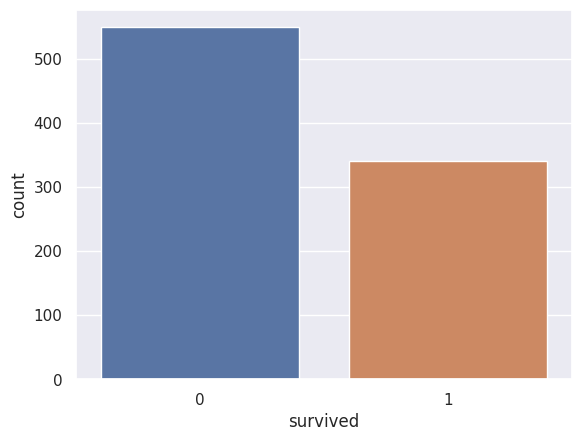

In [19]:
sns.countplot(x='survived', data=df);

In [20]:
df.pclass.value_counts(normalize=True)

pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64

        More than 55% of the passengers were from 3rd class

In [21]:
df.sibsp.value_counts(normalize=True)

sibsp
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: proportion, dtype: float64

        More than 68% of the passengers had no siblings or spouse

In [22]:
def explore_categorical(df, col):
    print(f'### {col} ###')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

### pclass ###
pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64


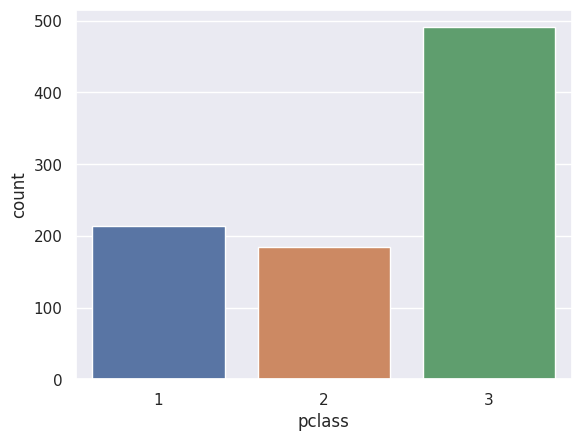

### sibsp ###
sibsp
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: proportion, dtype: float64


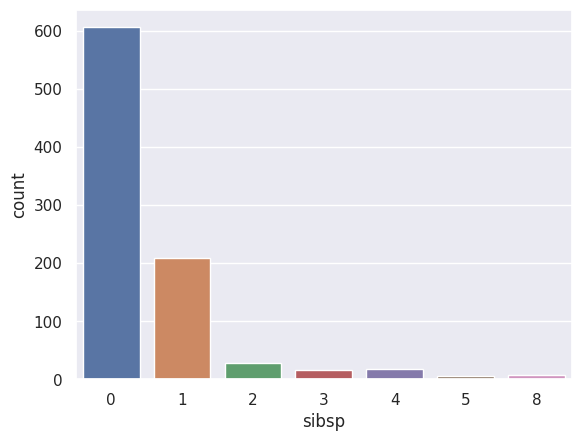

### parch ###
parch
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: proportion, dtype: float64


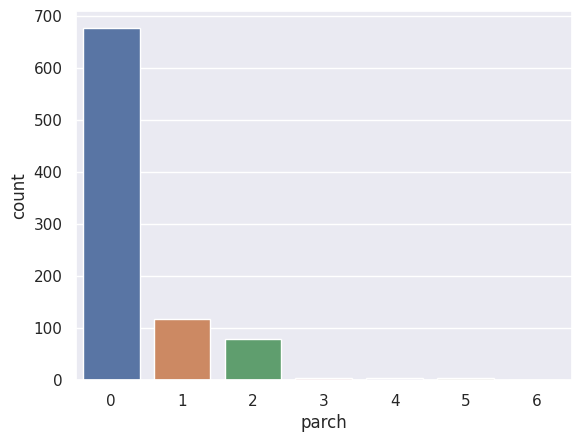

### embarked ###
embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


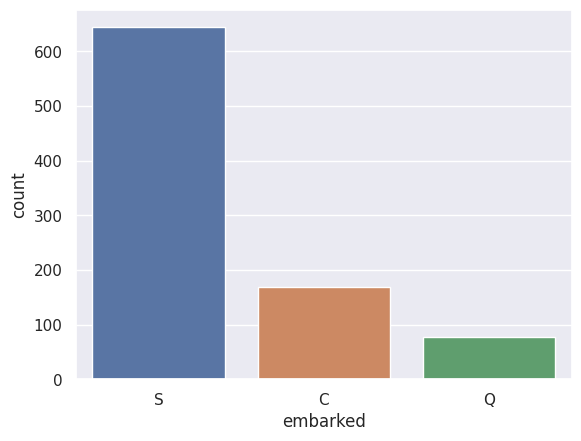

### sex ###
sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64


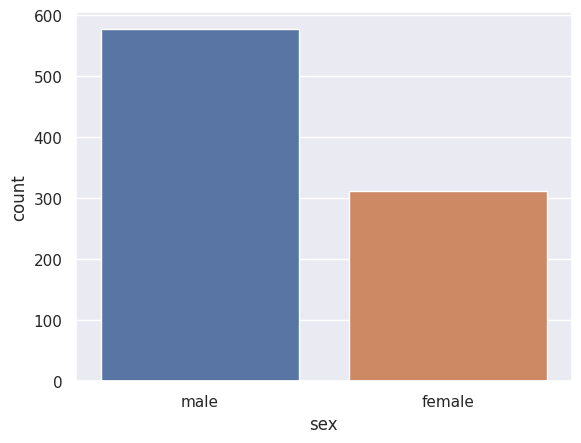

In [23]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    explore_categorical(df, col)

In [24]:
def explore_continuous(df, col):
    print(f'### {col} ###')
    print(df[col].describe())
    sns.histplot(x=col, data=df);
    plt.show()

### age ###
count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: age, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


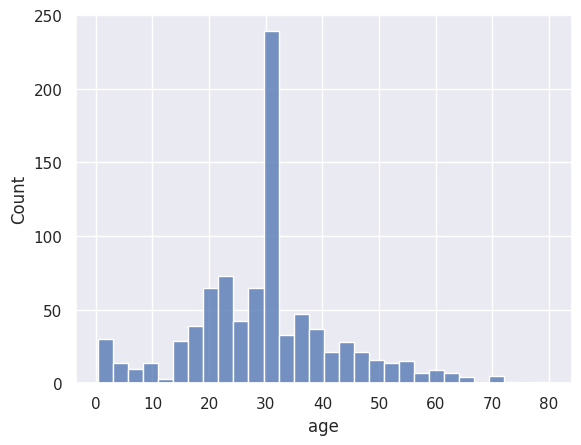

### fare ###
count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


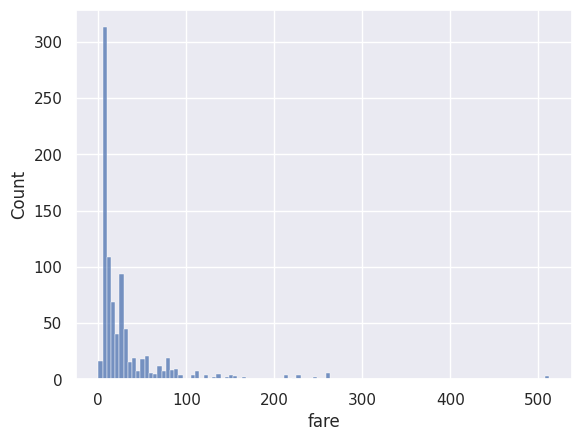

In [25]:
for col in ['age', 'fare']:
    explore_continuous(df, col)


# Bivariate Analysis

In [26]:
df.groupby('pclass').survived.mean()

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

        The higher the class, the higher the survival rate

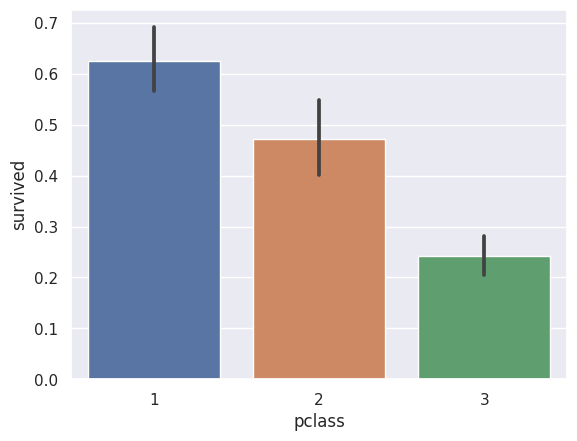

In [27]:
# plot class vs survived
sns.barplot(x='pclass', y='survived', data=df);

/tmp/ipykernel_13/3650877100.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None);


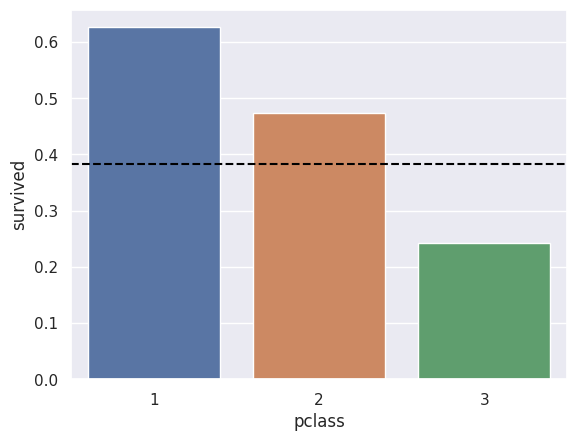

In [28]:
sns.barplot(x='pclass', y='survived', data=df, ci=None);
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='--');
plt.show()

In [29]:
# Survival rate for each group
def survival_rate(df, col):
    print(df.groupby(col).survived.mean())
    sns.barplot(x=col, y='survived', data=df, ci=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()


pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


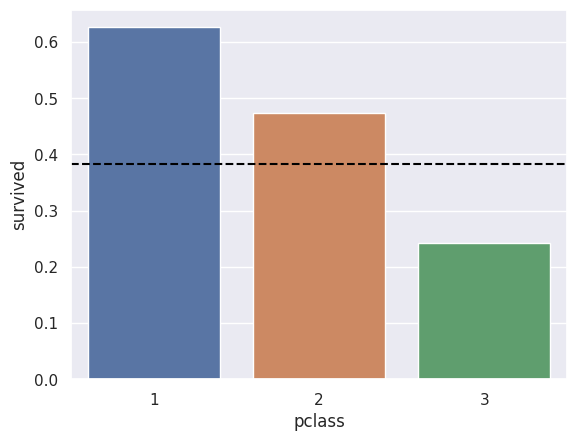

sibsp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


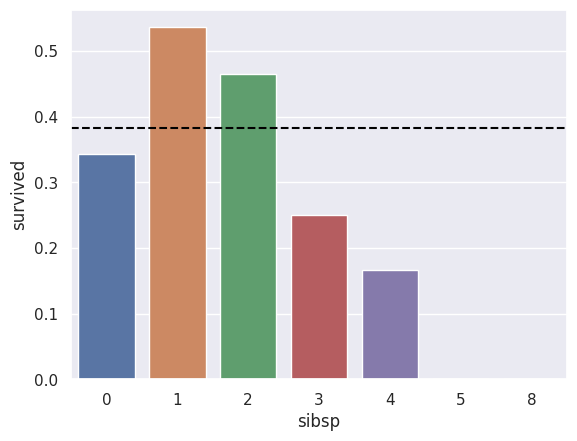

parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


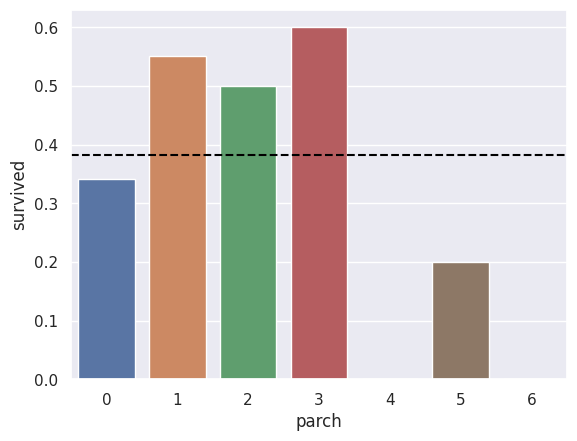

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


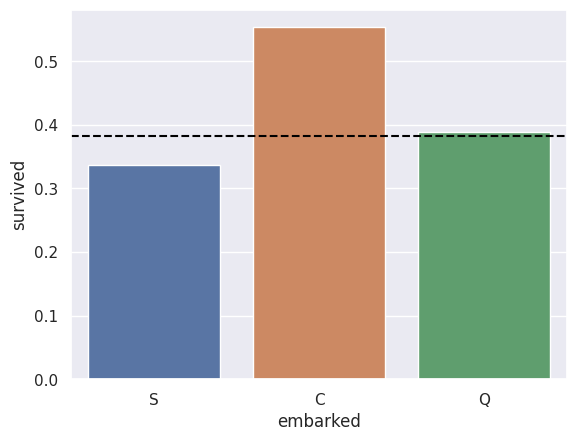

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


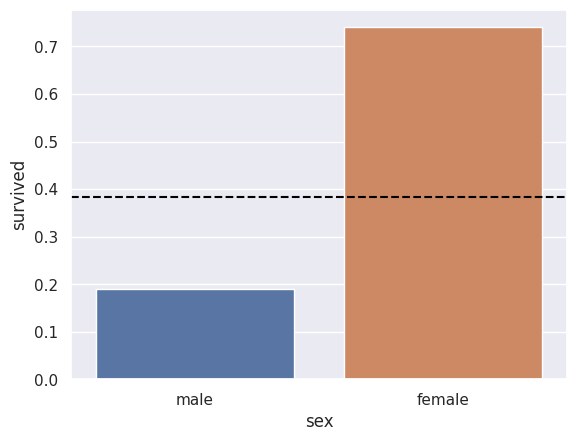

In [30]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    survival_rate(df, col)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

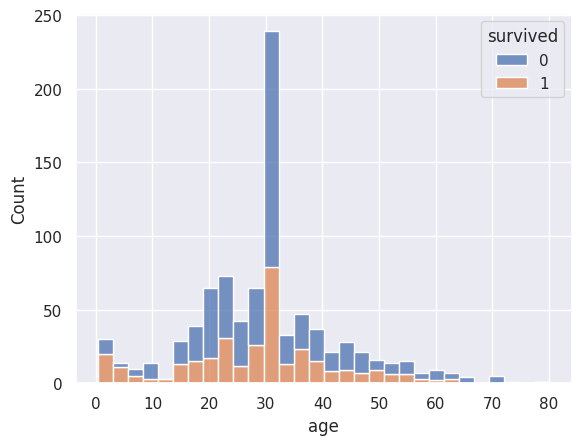

In [31]:
sns.histplot(x='age', data=df, hue='survived', multiple='stack');

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


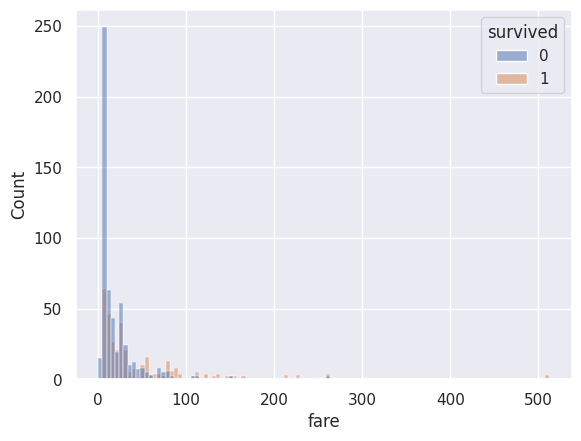

In [32]:
sns.histplot(x='fare', data=df, hue='survived');

In [33]:
df_survived = df[df.survived == 1]
df_died = df[df.survived == 0]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


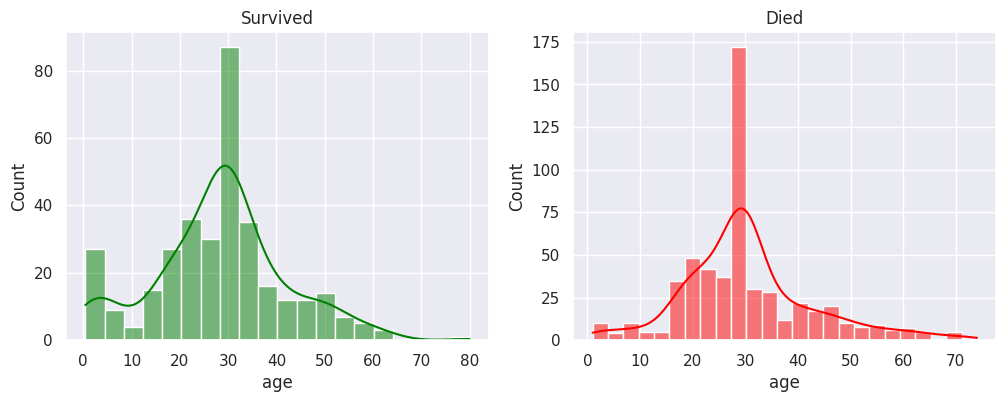

In [34]:
# Subplots for age distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='age', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


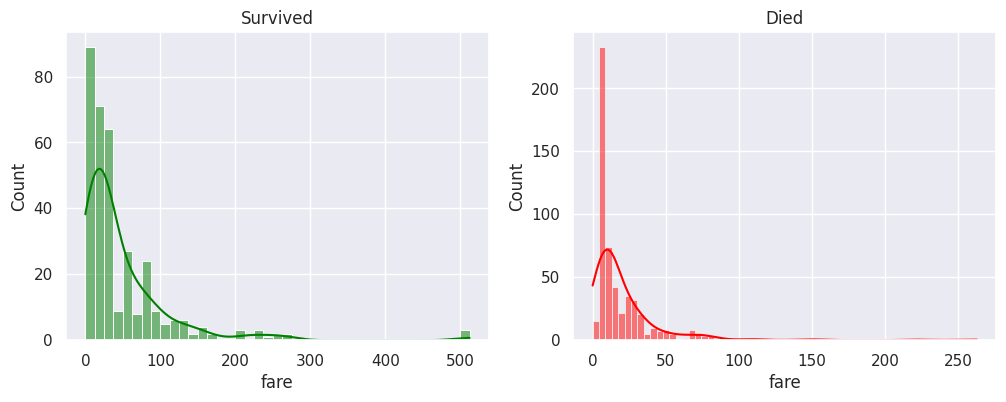

In [35]:
# Subplots for fare distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='fare', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='fare', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

In [36]:
df.describe()[['age', 'fare']]

,age,fare
count,889.000000,889.000000
mean,29.642093,32.096681
std,12.968346,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.642093,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


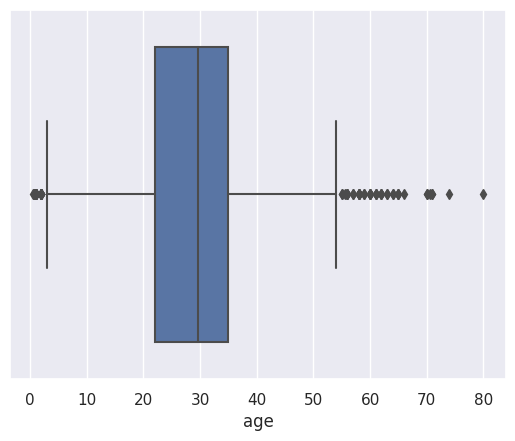

In [37]:
sns.boxplot( x='age', data=df);

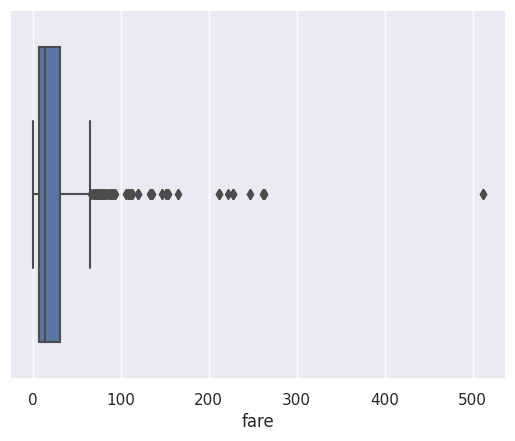

In [38]:
sns.boxplot( x='fare', data=df);

            Many outliers in the fare
* We can use the IQR method to remove them.
* We can also choose a limit according to the distribution of the data.


# Outliers Detection

In [39]:
# Remove outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [40]:
df = df[df.fare < 300]
# df = remove_outliers(df, 'fare')

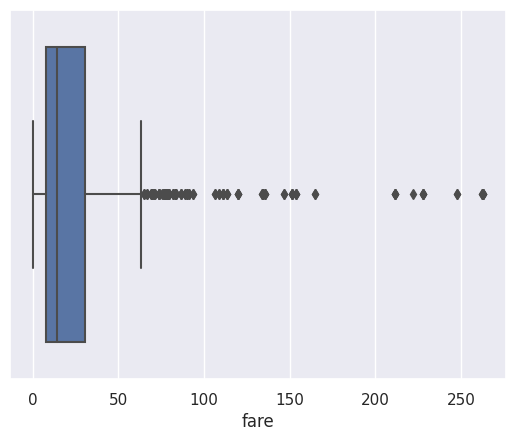

In [41]:
sns.boxplot( x='fare', data=df);

In [42]:
# Split Age into groups
df['age_group'] = pd.cut(df.age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

age_group
child     0.424242
young     0.405660
adult     0.349862
senior    0.370968
Name: survived, dtype: float64


/tmp/ipykernel_13/2779290449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean())
/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


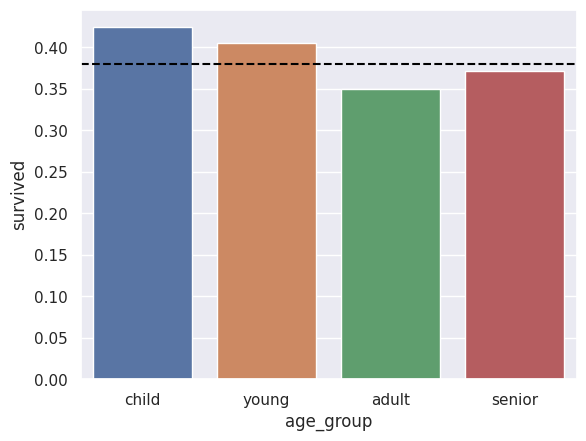

/tmp/ipykernel_13/2779290449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean())
/tmp/ipykernel_13/2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


fare_group
low          0.215768
medium       0.285714
high         0.446809
very high    0.611399
Name: survived, dtype: float64


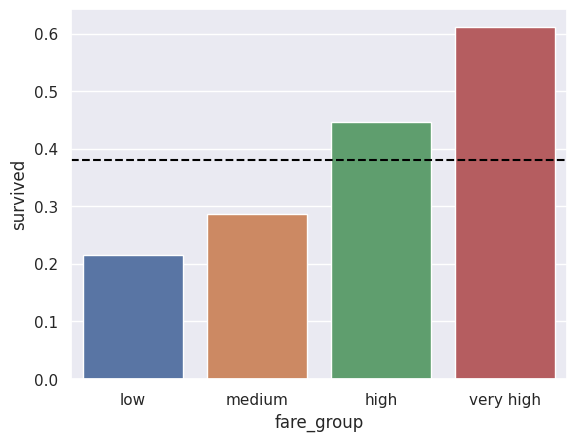

In [43]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

# Multivariate Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

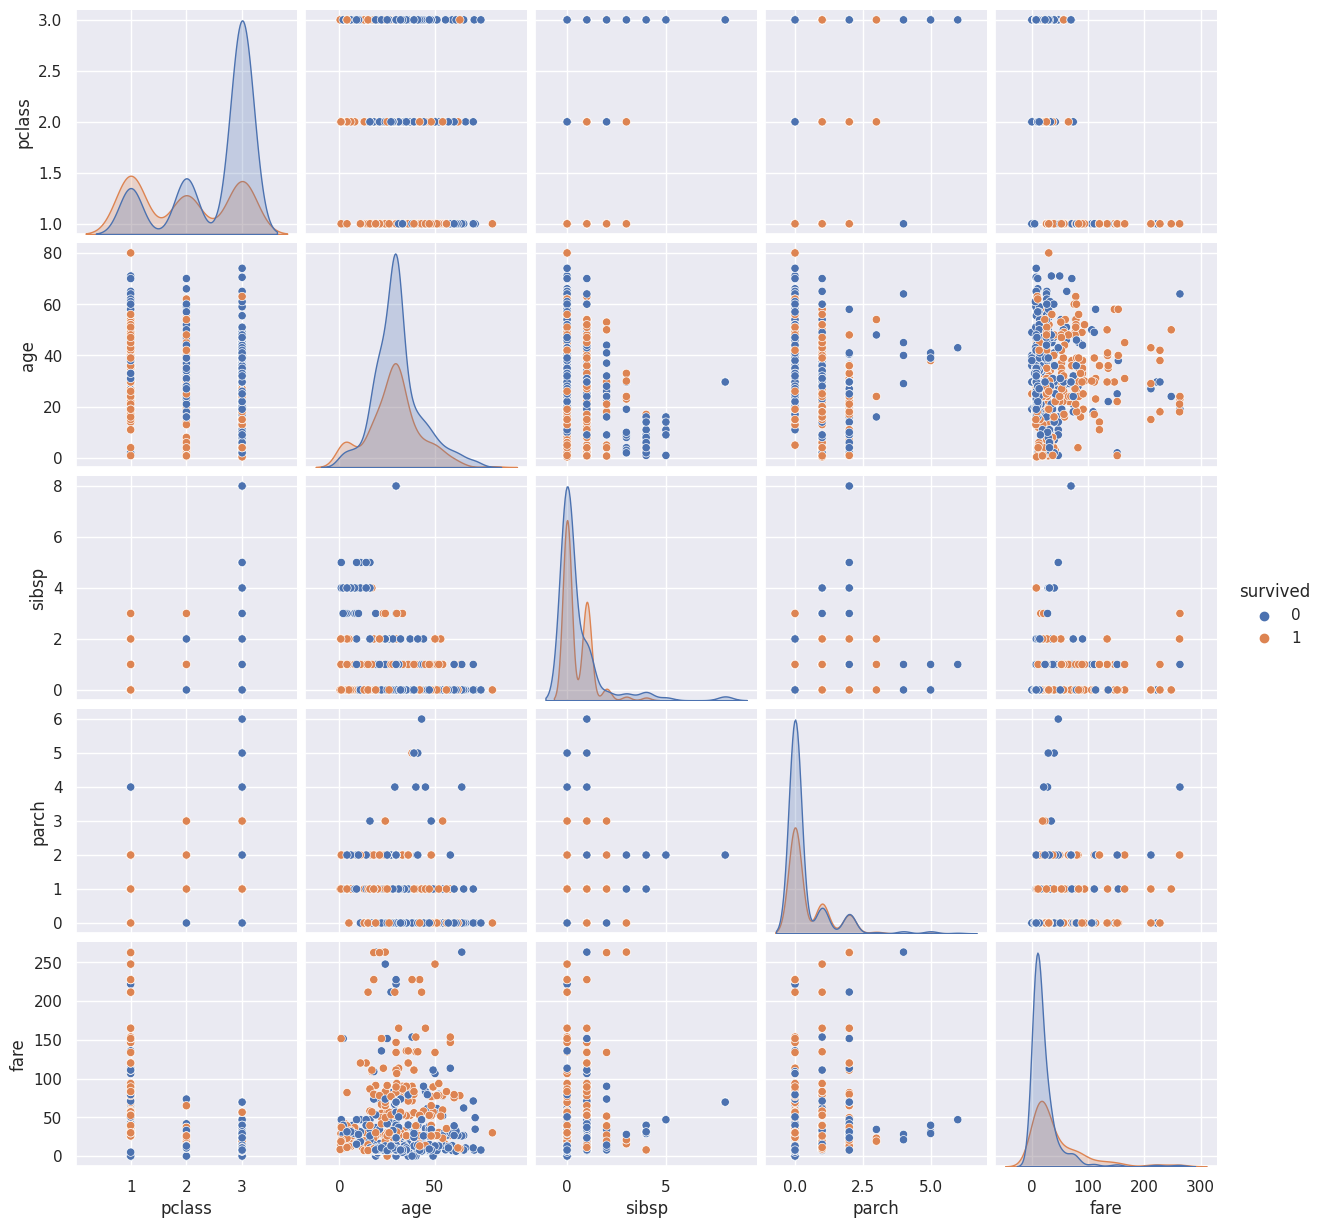

In [44]:
sns.pairplot(df, hue='survived');

In [45]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.331075,-0.076637,-0.032095,0.083691,0.259188
pclass,-0.331075,1.000000,-0.327398,0.079490,0.016579,-0.603362
age,-0.076637,-0.327398,1.000000,-0.231366,-0.178157,0.090029
sibsp,-0.032095,0.079490,-0.231366,1.000000,0.414844,0.213507
parch,0.083691,0.016579,-0.178157,0.414844,1.000000,0.265692
fare,0.259188,-0.603362,0.090029,0.213507,0.265692,1.000000


In [46]:
df.corr(numeric_only=True)['survived']

survived    1.000000
pclass     -0.331075
age        -0.076637
sibsp      -0.032095
parch       0.083691
fare        0.259188
Name: survived, dtype: float64

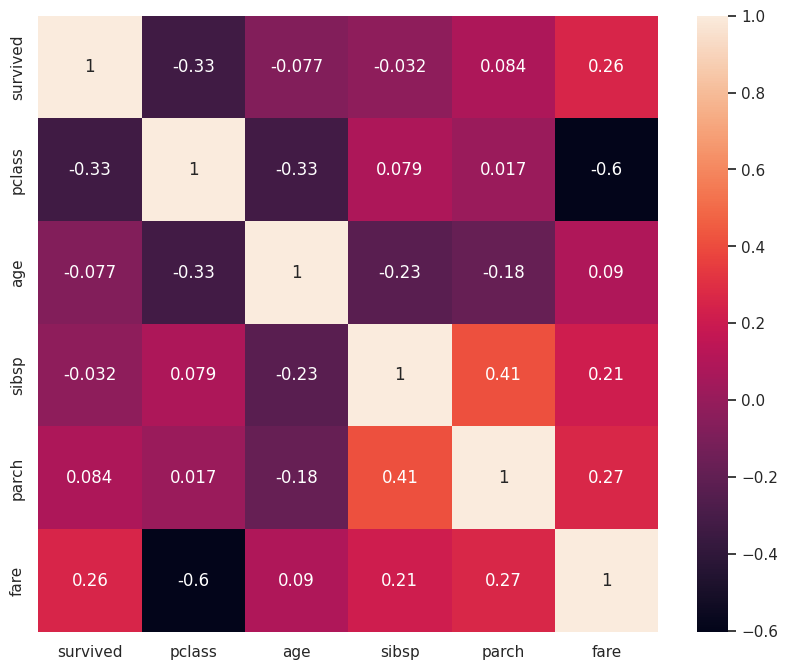

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

/tmp/ipykernel_13/1058057586.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


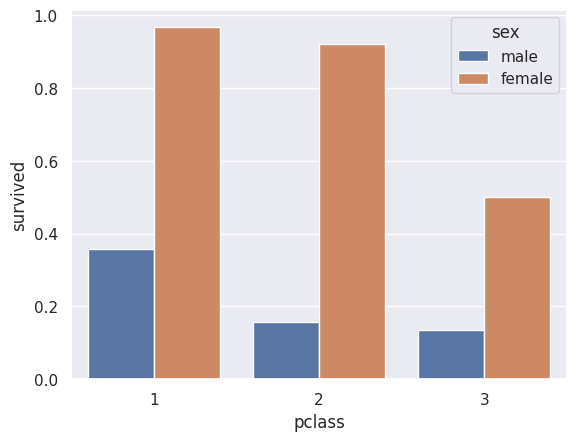

In [48]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);

/tmp/ipykernel_13/3729839610.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


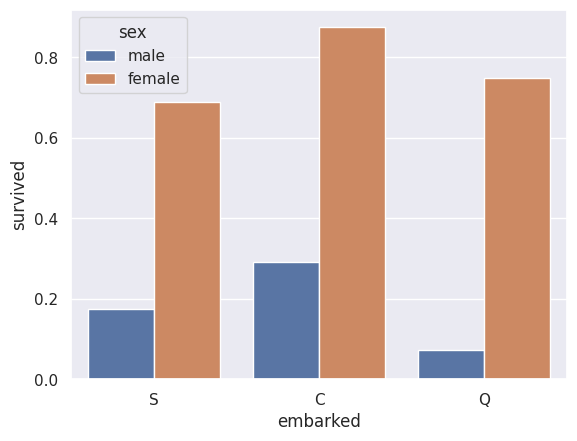

In [49]:
sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);

# Conclusion

/tmp/ipykernel_13/189345143.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipykernel_13/189345143.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipykernel_13/189345143.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipykernel_13/189345143.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

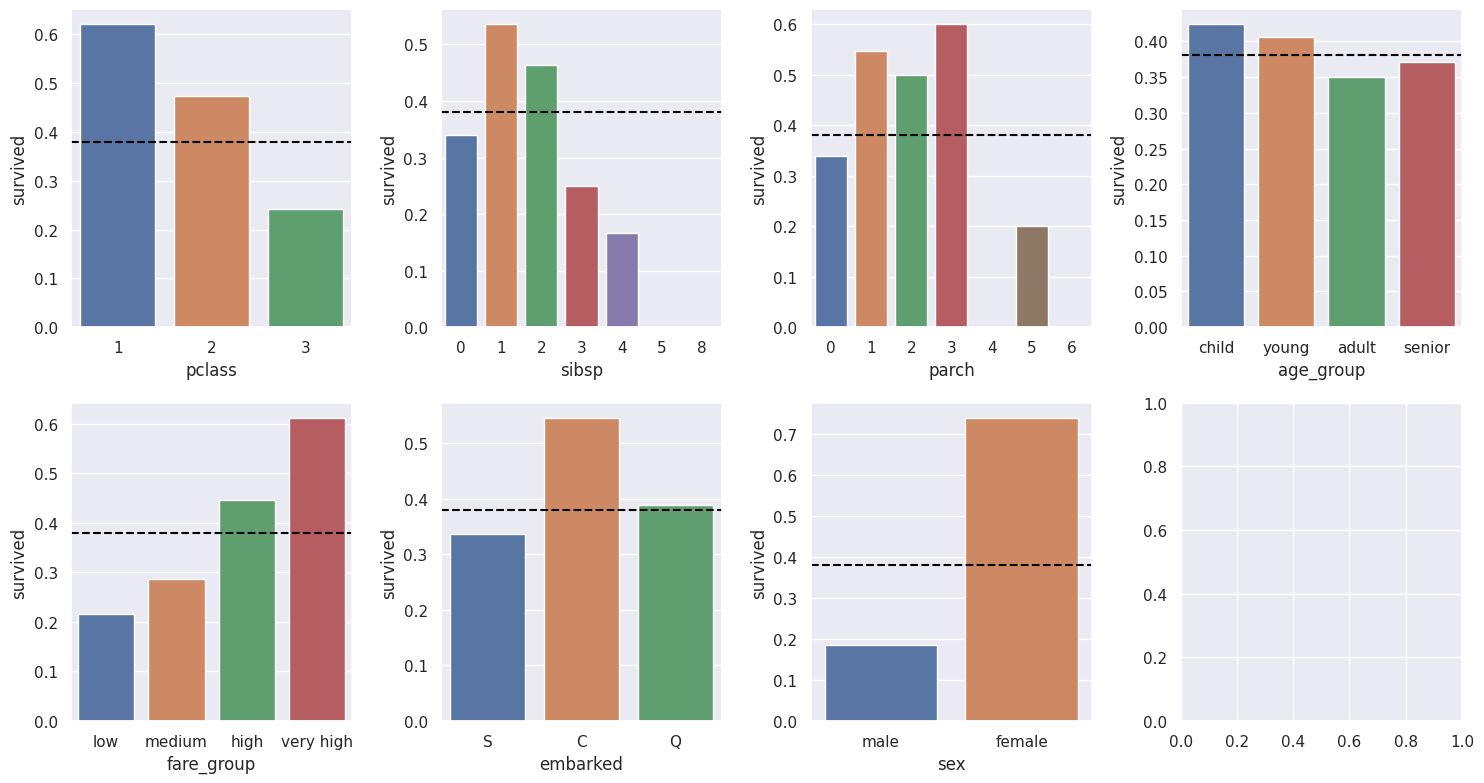

In [50]:
# 7 Subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()


In [51]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

In [52]:
# female_df.to_csv('female_passengers.csv')

In [53]:
female_df.survived.value_counts(normalize=True)

survived
1    0.73955
0    0.26045
Name: proportion, dtype: float64

In [54]:
female_df.groupby('pclass').survived.mean()

pclass
1    0.967033
2    0.921053
3    0.500000
Name: survived, dtype: float64

/tmp/ipykernel_13/3474947662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=female_df, ci=None);


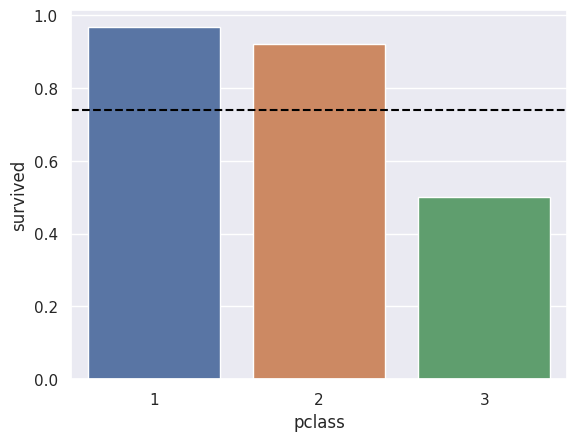

In [55]:
sns.barplot(x='pclass', y='survived', data=female_df, ci=None);
plt.axhline(female_df.survived.mean(), color='black', linestyle='--')
plt.show()

In [56]:
male_df.survived.value_counts(normalize=True)

survived
0    0.813913
1    0.186087
Name: proportion, dtype: float64

In [57]:
male_df.groupby('pclass').survived.mean()

pclass
1    0.358333
2    0.157407
3    0.135447
Name: survived, dtype: float64

/tmp/ipykernel_13/2591017502.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=male_df, ci=None);


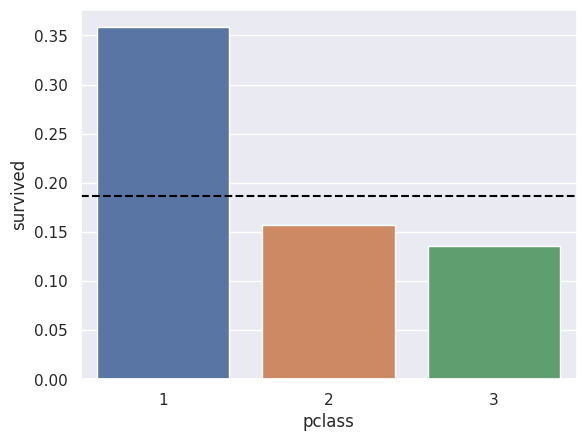

In [58]:
sns.barplot(x='pclass', y='survived', data=male_df, ci=None);
plt.axhline(male_df.survived.mean(), color='black', linestyle='--')

In [59]:
sex_class = pd.merge(female_df.groupby('pclass').survived.mean(), male_df.groupby('pclass').survived.mean(), on='pclass')
sex_class.rename(columns= {'survived_x': 'female_survived', 'survived_y': 'male_survived'}, inplace=True)
sex_class

,female_survived,male_survived
pclass,,
1,0.967033,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [60]:
df.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.967033
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

# Insights

```
# This is formatted as code
```


* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* Females had a higher survival rate